In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = torch.Tensor([0,1,2,3,4,5])

In [4]:
print(a.view(6, 1))
print(a.view(-1, 1))

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.]])
tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.]])


In [6]:
np_a = np.array([0,1,2,3,4])
t_a = torch.from_numpy(np_a)
back_transform = t_a.numpy()

In [13]:
t_a = t_a.double()
print(torch.sin(t_a))

tensor([ 0.0000,  0.8415,  0.9093,  0.1411, -0.7568], dtype=torch.float64)


In [15]:
x = torch.linspace(-2, 2, 100)
y = torch.sin(x)

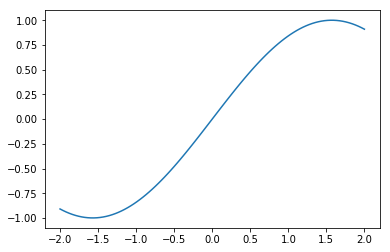

In [16]:
plt.plot(x.numpy(), y.numpy())

In [17]:
a = torch.Tensor([0,1,2,3])
print(a.type())

torch.FloatTensor


In [21]:
a = a.type(torch.DoubleTensor)
print(a.type())

torch.DoubleTensor


In [25]:
print(a[0:3])

tensor([0., 1., 2.], dtype=torch.float64)


In [26]:
l = [[11,12,13], [21,22,23],[31,32,33]]
l_t = torch.Tensor(l)

In [33]:
print(l_t[0,0:1])

tensor([11.])


In [44]:
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)

In [45]:
f = x**2 + y**3 + 3

In [46]:
f.backward()

In [47]:
print(x.grad)

tensor(4.)


In [48]:
print(y.grad)

tensor(3.)


In [49]:
print(f.grad_fn)

In [52]:
y.detach().numpy()

array(1., dtype=float32)

In [53]:
w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(-1.0, requires_grad=True)

In [54]:
def forward(x):
    y = w*x + b
    return y

In [55]:
x = torch.tensor([1.0])
y_hat = forward(x)
print(y_hat)

tensor([1.], grad_fn=<ThAddBackward>)


In [59]:
from torch.nn import Linear
import torch.nn as nn

In [63]:
model = Linear(in_features=1, out_features=1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.4349]], requires_grad=True), Parameter containing:
tensor([-0.8642], requires_grad=True)]


In [115]:
class Mymodel(nn.Module):
    def __init__(self):
        super(Mymodel, self).__init__()
        self.model = nn.Linear(in_features=10, out_features=1)
    def forward(self, x):
        return self.model(x)

In [116]:
mym = Mymodel()
print(mym)

Mymodel(
  (model): Linear(in_features=10, out_features=1, bias=True)
)


In [117]:
x_batch = torch.randn((20,10), requires_grad=True)

In [118]:
y_batch = mym.forward(x_batch)
print(y_batch)

tensor([[-0.5085],
        [-0.6246],
        [ 0.2227],
        [-0.6314],
        [-0.7700],
        [ 0.0714],
        [-0.7634],
        [ 0.1315],
        [-0.8793],
        [-0.7144],
        [ 0.0255],
        [ 0.4768],
        [-0.0352],
        [-0.6691],
        [-1.1456],
        [-0.1719],
        [-1.0413],
        [ 0.9316],
        [-0.0422],
        [-0.4968]], grad_fn=<ThAddmmBackward>)


In [119]:
import torch.optim as optim

In [120]:
y_batch = y_batch.detach().view(-1)

In [121]:
criterion = nn.MSELoss()
optimizer = optim.Adam(mym.parameters())

In [122]:
y = torch.randn(20, requires_grad=True)

In [123]:
err = criterion(y_batch, y)

In [124]:
err.backward()

In [125]:
optimizer.step()

In [126]:
print(mym.forward(x_batch))

tensor([[-0.5085],
        [-0.6246],
        [ 0.2227],
        [-0.6314],
        [-0.7700],
        [ 0.0714],
        [-0.7634],
        [ 0.1315],
        [-0.8793],
        [-0.7144],
        [ 0.0255],
        [ 0.4768],
        [-0.0352],
        [-0.6691],
        [-1.1456],
        [-0.1719],
        [-1.0413],
        [ 0.9316],
        [-0.0422],
        [-0.4968]], grad_fn=<ThAddmmBackward>)
